## Lab 5
#### My Name is ??
#### In collaboration with ?? 

### Tasks

<b>Task 1</b><br>
The Weibull distribution is a continuous probability distribution that is used to model many different random variables, such as the failure rate of mechanisms where the probability of failure increases over time. In general, the probability density function has the form 
$$ f(x) = \begin{cases} \frac{kx^{k-1}}{\lambda^k}e^{-(x/\lambda)^k} & x \ge 0 \\ 0 & x < 0 \end{cases}$$

Plot the pdf for the Weibull distribution with $\lambda = 1$ and $k = 2$. Choose an appropriate range of $x$ values so that the main features of the pdf are clear. 

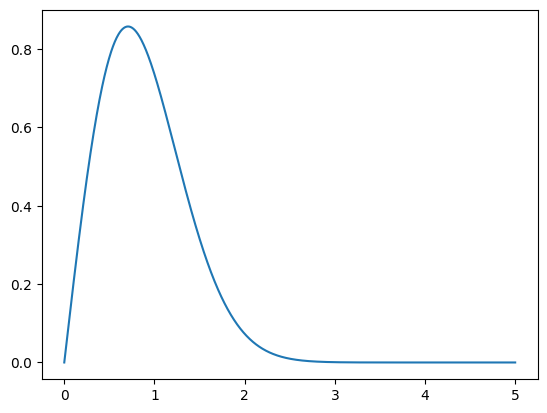

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def Weibull(x,k,lam):
    if x >= 0:
        return k*x**(k-1)/lam**k*np.exp(-(x/lam)**k)
    else:
        return 0 

xvals = np.linspace(0,5,1000)
yvals = [Weibull(x,2,1) for x in xvals]
plt.plot(xvals,yvals)

<b>Task 2</b><br>
By hand, find the inverse of the CDF for the Weibull distribution with $\lambda = 1$ and $k = 2$. Use a markdown box to record some of your steps. 

Cheating and using Wikipedia tells me that the CDF is $F(x) = 1-e^{-(x/\lambda)^k}$ and therefore when $k = 2$ and $\lambda = 1$ we have $F^{-1}(x) = \sqrt{-\ln(1-x)}$

<b>Task 3</b> <br>
Use the inverse CDF you found in task 2 to generate 10000 samples from the Weibull distribution with $\lambda = 1$ and $k=2$. Plot a histogram with these samples and compare with your plot from task 1. 

Notes: Plot the samples and pdf from part 1 on the same axes in order to make the comparison clear.  Make sure to use the `density=True` argument in the histogram plot.

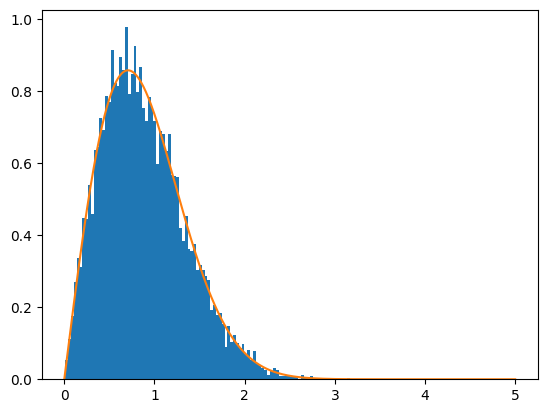

In [5]:
def Inv_W_CDF(x):
    return np.sqrt(-np.log(1-x))

samples = []
for j in range(10000):
    y = np.random.rand()
    samples.append(Inv_W_CDF(y))

plt.hist(samples,bins=100, density=True);
plt.plot(xvals,yvals)

<b>Task 4 </b><br>
The Beta distribution is a continuous probability distribution that is used to describe percentages and proportions. The pdf for the Beta distribution is 
$$f(x) = \begin{cases} \frac{(\alpha+\beta-1)!}{(\alpha-1)!(\beta-1)!}x^{\alpha-1}(1-x)^{\beta-1} & x\in(0,1)\\ 0  & x\notin(0,1). \end{cases}$$

Create a function to compute the pdf of the Beta distribution. On the same axes, plot the pdf when $\alpha =2, \beta=2$, when $\alpha =3, \beta = 2$ and when $\alpha = 5, \beta = 2$.

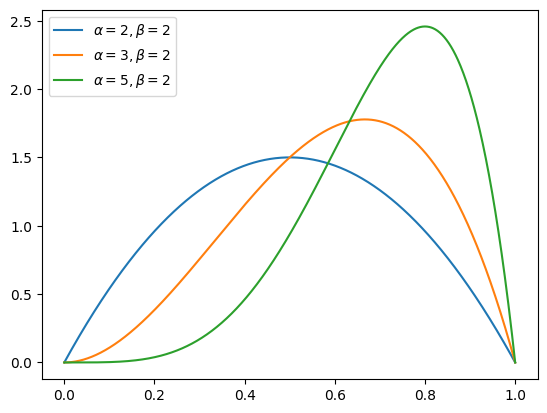

In [20]:
## Using the factorial function defined in the previous lab:
def factorial(n):
    if n == 0: # Test if n = 0
        return 1 # if n = 0, then return 0! = 1
    else:   # If n =/= 0, then do this instead:
        fact = n # Define the initial value for the factorial
        for i in range(1,n): #range up to n does not include n
            fact = fact * i #multiply fact by all the values from 1 to n
        return fact # return the value fact 

def Beta(x,a,b):
    if (0<x<1):
        return factorial(a+b-1)/(factorial(a-1)*factorial(b-1))*x**(a-1)*(1-x)**(b-1)
    else:
        return 0

xvals = np.linspace(0,1,1000)
y1vals = [Beta(x,2,2) for x in xvals]
y2vals = [Beta(x,3,2) for x in xvals]
y3vals = [Beta(x,5,2) for x in xvals]
plt.plot(xvals,y1vals, label = r"$\alpha =2, \beta = 2$")
plt.plot(xvals,y2vals, label = r"$\alpha=3,\beta=2$")
plt.plot(xvals,y3vals, label = r"$\alpha=5,\beta=2$")
plt.legend()

<b> Task 5</b> <br>
Use the Metropolis-Hastings algorithm to sample 50,000 values from the Beta distribution with $\alpha = 5$ and $\beta = 2$. Plot a histogram with these samples and compare with your pdf from task 4.  

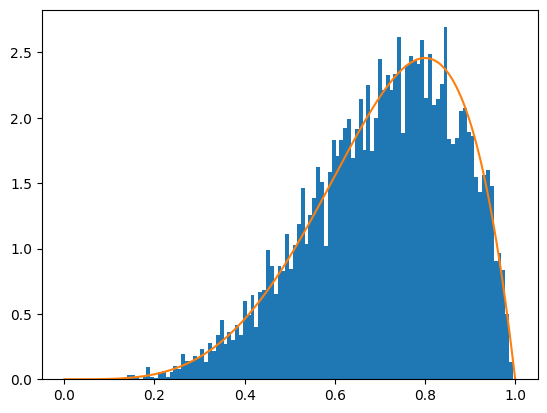

In [21]:
xt = [np.random.rand()] ## Choose an arbitrary number between 0 and 1 to start
# I chose to make this part of a list so I could append the new values at each itteration

# Sample 40000 values
for j in range(40000):
    xtemp = np.random.normal(xt[-1],1) ## Propose a new value for x 
    alpha = Beta(xtemp,5,2)/Beta(xt[-1],5,2) # Calculate the acceptance ratio
    y = np.random.rand() # Find a uniformly distributed random value y
    if y <= alpha: 
        xt.append(xtemp) # If y <= alpha, accept the proposed value
    else:
        xt.append(xt[-1]) # If y > alpha, reject the proposed value

plt.hist(xt,bins=100,density=True,align="left")
plt.plot(xvals,y3vals)